# Procedural program to get and analyze RSS-Newsfeeds

## Libraries and settings

In [1]:
# Libraries
import os
import requests
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from requests_html import HTMLSession

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\Scientific_Programming_FS2024\scientific_programming\Week_07\challenge


## Functions to get the content of RSS-Feeds

In [2]:
def get_source(url):
    """
    Provides source code of the website of the specified URL.

    :param url: URL of the page to scrape. Type = str
    :return: Response from serrver request. Type = requests_html.HTMLResponse
    """
    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_single_feed(url):
    """
    Derives the content of a single RSS-Feed for the provided URL.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    response = get_source(url)
    rows = []

    with response as r:
        items = r.html.find("item", first=False)
        for item in items:
            title = item.find('title', first=True).text
            pubDate = item.find('pubDate', first=True).text
            guid = item.find('guid', first=True).text
            description_element = item.find('description', first=True)
            
            # Check if 'description' element exists before accessing 'text'
            description = description_element.text if description_element is not None else ""
            
            row = {'title': title, 'pubDate': pubDate, 'guid': guid, 'description': description}
            rows.append(row)

    df = pd.DataFrame(rows)
    return df

def get_multiple_feeds(url_list):
    """
    Derives the content on RSS-Feed for the provided list of URLs.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    
    df = pd.DataFrame(columns = ['title', 'pubDate', 'guid', 'description'])

    for url in url_list:

        df_iter = get_single_feed(url)
        df = pd.concat([df, df_iter], ignore_index=True)

    return df


## Getting infos from single RSS-Feed

In [3]:
# Call functions for single feed
df_feed = get_single_feed('https://www.nzz.ch/international.rss')
df_feed.head(10)

,title,pubDate,guid,description
0,Israelische Spezialkräfte stürmen Spital in Kh...,"Thu, 15 Feb 2024 15:58:17 GMT",ld.1814217,Tausende Palästinenser müssen das Gelände verl...
1,Neue Diskussion um Atomwaffen: Trumps Äusserun...,"Thu, 15 Feb 2024 15:51:46 GMT",ld.1814200,"Seit längerem geht es um die Frage, wie Europa..."
2,"Wladimir Putin nannte ihn einen «Halunken», un...","Thu, 15 Feb 2024 10:56:17 GMT",ld.1814125,Christoph Heusgen ist seit zwei Jahren der Vor...
3,KOMMENTAR - Ein unappetitlicher Ex-General als...,"Thu, 15 Feb 2024 09:53:45 GMT",ld.1807499,"Prabowo Subianto, der Schwiegersohn des früher..."
4,«Freiheit für Brustwarzen»: Eine junge Türkin ...,"Thu, 15 Feb 2024 10:40:00 GMT",ld.1807374,Gewalt gegen Frauen ist in der Türkei weit ver...
5,INTERVIEW - «Wir befinden uns in einer existen...,"Thu, 15 Feb 2024 04:30:00 GMT",ld.1807659,Die Anschuldigungen gegen das Uno-Hilfswerk fü...
6,Pakistans Militär herrscht über ein Milliarden...,"Thu, 15 Feb 2024 04:30:00 GMT",ld.1807491,Praktisch seit der Gründung des Staates beeinf...
7,PODCAST - Israel plant eine Offensive in Rafah...,"Thu, 15 Feb 2024 04:30:00 GMT",ld.1814049,Nach über vier Monaten Gaza-Krieg sind alle Au...
8,Hochrangiger US-Politiker mahnt: Russland arbe...,"Thu, 15 Feb 2024 02:22:14 GMT",ld.1814144,Hat es Moskau auf amerikanische Satelliten abg...
9,Mit 72 Jahren am Ziel seiner Träume: Ein Ex-Ge...,"Wed, 14 Feb 2024 15:31:00 GMT",ld.1812105,2014 und 2019 hatte sich Prabowo Subianto im W...


## Getting infos from multiple RSS-Feeds

In [4]:
# List with RSS-Feeds (germ. and engl.)

url_list = ['https://www.spiegel.de/schlagzeilen/index.rss',
            'https://www.nzz.ch/international.rss',
            'https://rss.nytimes.com/services/xml/rss/nyt/Europe.xml',
            'https://rss.nytimes.com/services/xml/rss/nyt/World.xml']

# Function call
df_multi_feeds = get_multiple_feeds(url_list)
df_multi_feeds.head(10)

,title,pubDate,guid,description
0,Chefredakteur Tim Geyer über das Ende von »Vice«,"Thu, 15 Feb 2024 20:22:00 +0100",https://www.spiegel.de/kultur/chefredakteur-ti...,Der deutsche Ableger von »Vice« wird Ende März...
1,Super-Bowl-Parade in Kansas City: Schüsse wohl...,"Thu, 15 Feb 2024 20:20:00 +0100",https://www.spiegel.de/panorama/justiz/super-b...,"Ein Mensch ist tot, mehr als 20 verletzt, und ..."
2,Lufthansa: Piloten der Tochter Discover wollen...,"Thu, 15 Feb 2024 20:00:00 +0100",https://www.spiegel.de/wirtschaft/unternehmen/...,Beim Lufthansa-Ferienflieger Discover Airlines...
3,Lastenräder von Babboe: Verkaufsverbot in den ...,"Thu, 15 Feb 2024 19:51:00 +0100",https://www.spiegel.de/auto/lastenraeder-von-b...,Der Hersteller Babboe gilt als Nummer eins bei...
4,Donald Trump und die Nato: Das sagt die Sicher...,"Thu, 15 Feb 2024 19:47:00 +0100",https://www.spiegel.de/ausland/donald-trump-un...,Washingtons Nato-Partner reagieren verstört au...
5,Geheimdienstbericht: Was steckt hinter den ang...,"Thu, 15 Feb 2024 19:19:00 +0100",https://www.spiegel.de/wissenschaft/technik/ge...,Nach Informationen amerikanischer Nachrichtend...
6,Superstar Kylian Mbappé verlässt Paris Saint-G...,"Thu, 15 Feb 2024 19:11:00 +0100",https://www.spiegel.de/sport/fussball/supersta...,Geht er oder bleibt er? Seit mehr als zwei Jah...
7,Norwegen: Attentäters Anders Breivik verliert ...,"Thu, 15 Feb 2024 18:55:00 +0100",https://www.spiegel.de/panorama/justiz/norwege...,"Der Attentäter von Utøya, Anders Breivik, woll..."
8,Signa-Luxussparte: KaDeWe-Gruppe türmte jahrel...,"Thu, 15 Feb 2024 18:54:00 +0100",https://www.spiegel.de/wirtschaft/signa-luxuss...,Die Luxuskaufhäuser rund um das KaDeWe galten ...
9,Dana Point in Kalifornien: Das Traumhaus und d...,"Thu, 15 Feb 2024 18:48:00 +0100",https://www.spiegel.de/panorama/dana-point-in-...,Ein Luxusanwesen thront malerisch über der kal...


## Finding the k most frequent words per RSS-Feed title

In [5]:
for item in df_multi_feeds['title']:

    from collections import Counter
    
    split_txt = item.split()
    Counter = Counter(split_txt)
    most_occur = Counter.most_common(5)
    print(most_occur)

[('Chefredakteur', 1), ('Tim', 1), ('Geyer', 1), ('über', 1), ('das', 1)]
[('Super-Bowl-Parade', 1), ('in', 1), ('Kansas', 1), ('City:', 1), ('Schüsse', 1)]
[('Lufthansa:', 1), ('Piloten', 1), ('der', 1), ('Tochter', 1), ('Discover', 1)]
[('Lastenräder', 1), ('von', 1), ('Babboe:', 1), ('Verkaufsverbot', 1), ('in', 1)]
[('die', 2), ('Donald', 1), ('Trump', 1), ('und', 1), ('Nato:', 1)]
[('Geheimdienstbericht:', 1), ('Was', 1), ('steckt', 1), ('hinter', 1), ('den', 1)]
[('Superstar', 1), ('Kylian', 1), ('Mbappé', 1), ('verlässt', 1), ('Paris', 1)]
[('Norwegen:', 1), ('Attentäters', 1), ('Anders', 1), ('Breivik', 1), ('verliert', 1)]
[('Signa-Luxussparte:', 1), ('KaDeWe-Gruppe', 1), ('türmte', 1), ('jahrelang', 1), ('immer', 1)]
[('Dana', 1), ('Point', 1), ('in', 1), ('Kalifornien:', 1), ('Das', 1)]
[('Autofasten', 1), ('in', 1), ('Thüringen:', 1), ('»Der', 1), ('ländliche', 1)]
[('Streit', 1), ('um', 1), ('Schiedsrichter-Leistungen', 1), ('im', 1), ('Fußball:', 1)]
[('Hörgeräte', 1), ('

## Create a wordcloud with the most frequent words in RSS-Feed titles

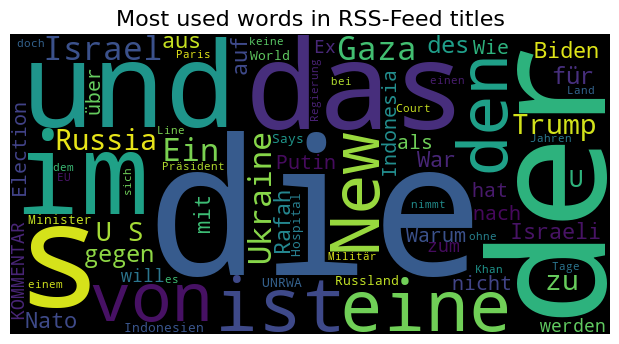

In [6]:
# Wordcloud function
def wordCloud_generator(data, title=None):
    """
    Creates a plot of a word cloud based on the given data

    :param data: input data. Type = str
    :param title: plot title. Type

    """
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(df_multi_feeds['title'], 
                    title="Most used words in RSS-Feed titles")

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [7]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-02-15 20:34:11
Python Version: 3.10.13
-----------------------------------
